This notebook consists of the implementation of multiple ML algorithms and Neural Newtworks. The ones covered are

--> KNN,
--> Naive Bayes,
--> Logistic Regression,
--> Support Vector Machine,
--> Neural Networks using Tensorflow

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

data = pd.read_csv('code1.data', names = cols)

data.head()
data.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h

In [6]:
# Gamma = 1
data["class"] = data["class"].replace("g", 1)

# Hadron = 0
data["class"] = data["class"].replace("h", 0)

print(data)

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610 

In [7]:
# for label in cols[:-1]:
#     plt.hist(data[data["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
#     plt.hist(data[data["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
#     plt.title(label)
#     plt.ylabel("Probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

In [8]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample= False):

    # The two lines of code below are just splitting the dataset into two parts
    # The first part is the data and the second part is the target
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # These lines of code will scale the data part due to the range of values it contains
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Oversampling the dataset with the less number of rows to make the length of the two datasets equal
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # This line of code is just joining the updated data with the target to give a new dataset
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [10]:
print(len(train[train["class"]==1])) # Gamma
print(len(train[train["class"]==0])) # Hadron

# The result will show an unalignment

7391
4021


In [11]:
# This code basically creates a train-test split by using the function created earlier

# So basically, this is a process of making the data suitable for the machine to work on

train, X_train, Y_train = scale_dataset(train, oversample=True)

valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)

test, X_test, Y_test = scale_dataset(test, oversample=False)

In [12]:
len(Y_train)

14782

In [13]:
sum(Y_train == 0)

7391

In [14]:
sum(Y_train == 1)

7391

---> kNN for classification

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
Y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1296
           1       0.86      0.85      0.86      2508

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



---> Naive Bayes for classification

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [23]:
y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52      1296
           1       0.75      0.88      0.81      2508

    accuracy                           0.73      3804
   macro avg       0.70      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



---> Logistic Regression for classification

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [26]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1296
           1       0.85      0.82      0.83      2508

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



---> Support Vector Machine for classification

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1296
           1       0.89      0.89      0.89      2508

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.85      3804



---> TensorFlow for a Neural Network Model

In [30]:
import tensorflow as tf

In [41]:
def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

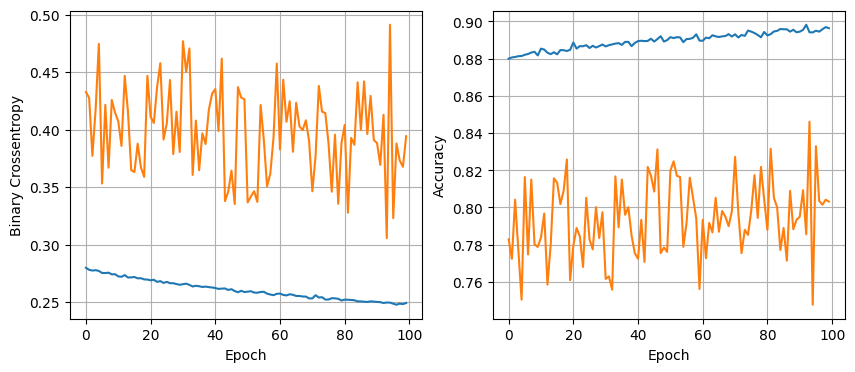

In [42]:
plot_history(history)

In [43]:
# In this function, the 'model' is the original model and 'history' is the trained model, i.e., which has been fitted with the training data.

def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

Number of nodes: 16, Dropout Probability: 0, learning rate: 0.1, Batch Size: 32


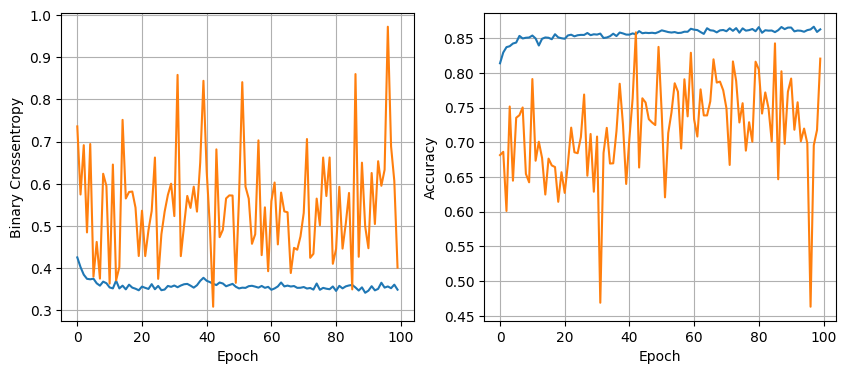

119/119 [==============================] - 0s 799us/step - loss: 0.3942 - accuracy: 0.8530
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.1, Batch Size: 64


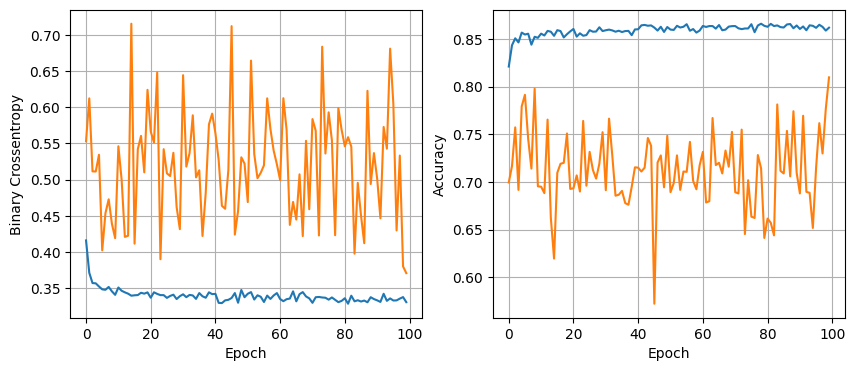

119/119 [==============================] - 0s 898us/step - loss: 0.4005 - accuracy: 0.8507
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.1, Batch Size: 128


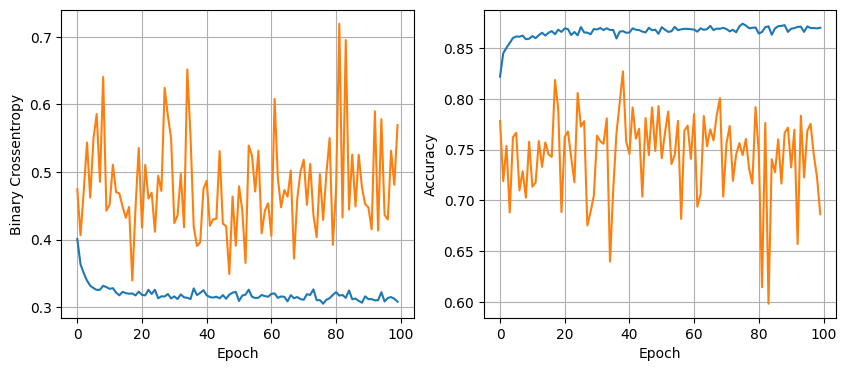

119/119 [==============================] - 0s 917us/step - loss: 0.3379 - accuracy: 0.8617
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.005, Batch Size: 32


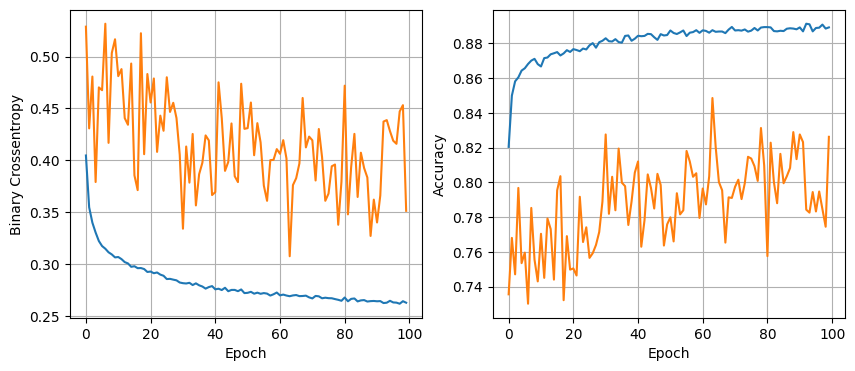

119/119 [==============================] - 0s 848us/step - loss: 0.3219 - accuracy: 0.8775
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.005, Batch Size: 64


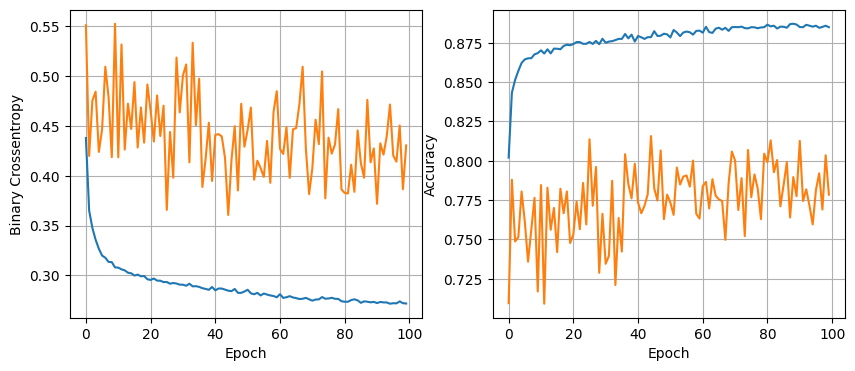

119/119 [==============================] - 0s 874us/step - loss: 0.3212 - accuracy: 0.8707
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.005, Batch Size: 128


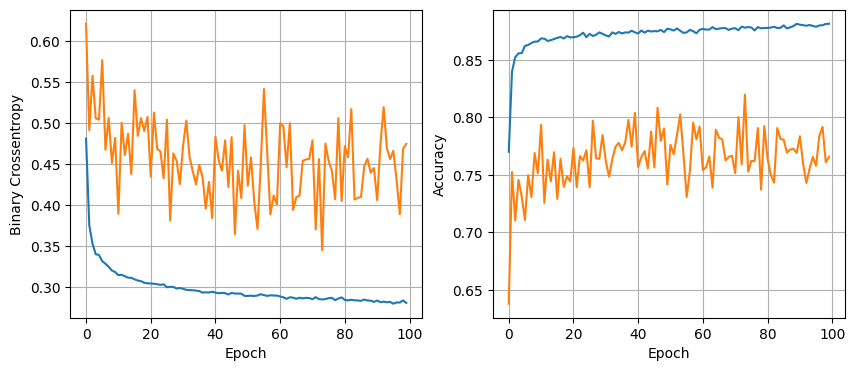

119/119 [==============================] - 0s 839us/step - loss: 0.3228 - accuracy: 0.8659
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.001, Batch Size: 32


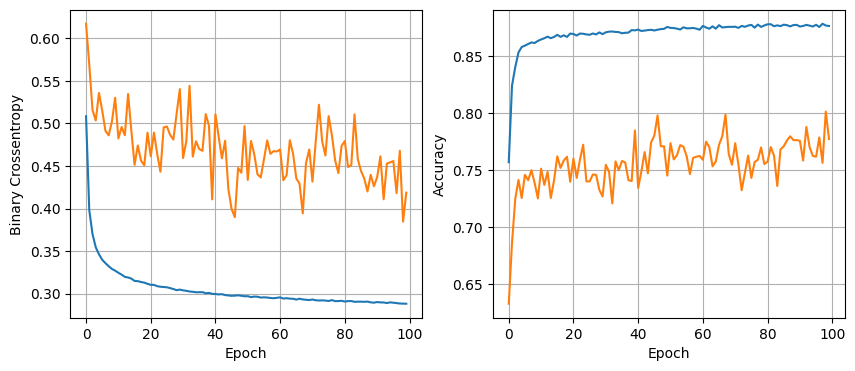

119/119 [==============================] - 0s 869us/step - loss: 0.3191 - accuracy: 0.8672
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.001, Batch Size: 64


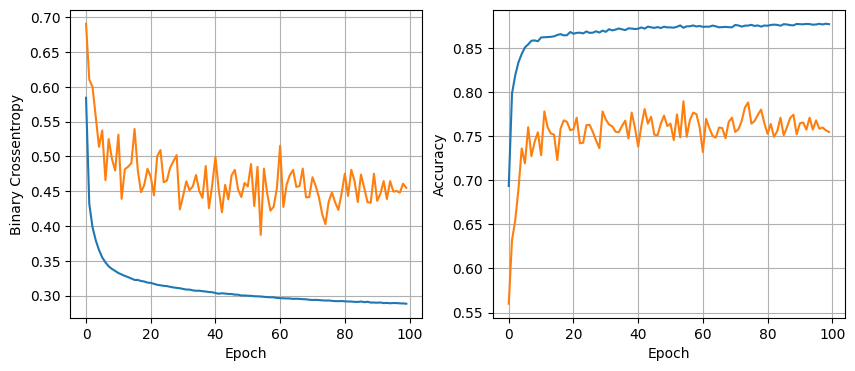

119/119 [==============================] - 0s 912us/step - loss: 0.3101 - accuracy: 0.8741
Number of nodes: 16, Dropout Probability: 0, learning rate: 0.001, Batch Size: 128


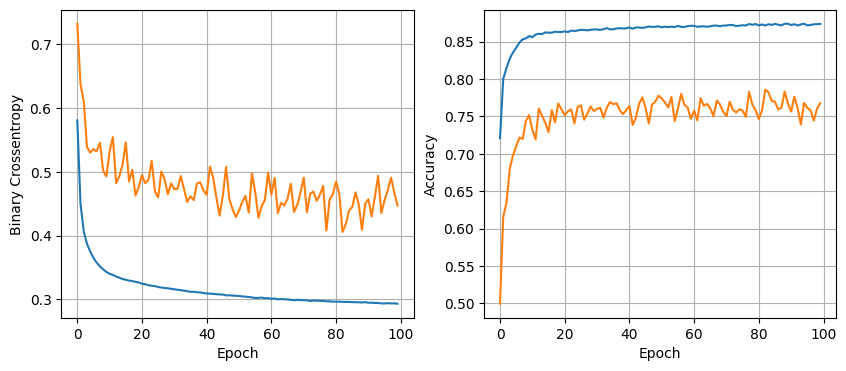

119/119 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8680
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 32


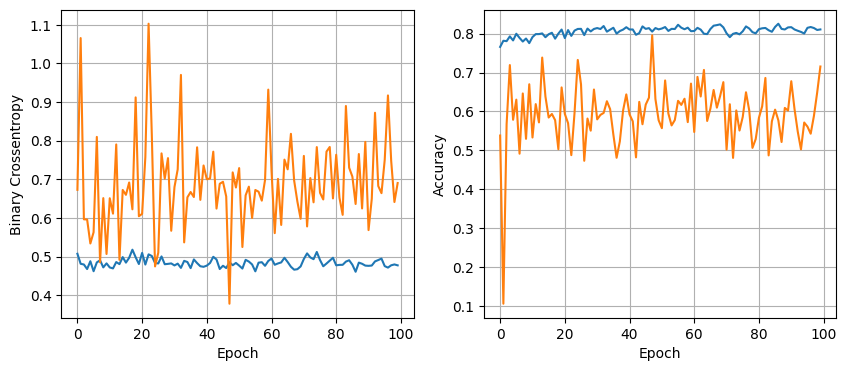

119/119 [==============================] - 0s 842us/step - loss: 0.4237 - accuracy: 0.8346
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 64


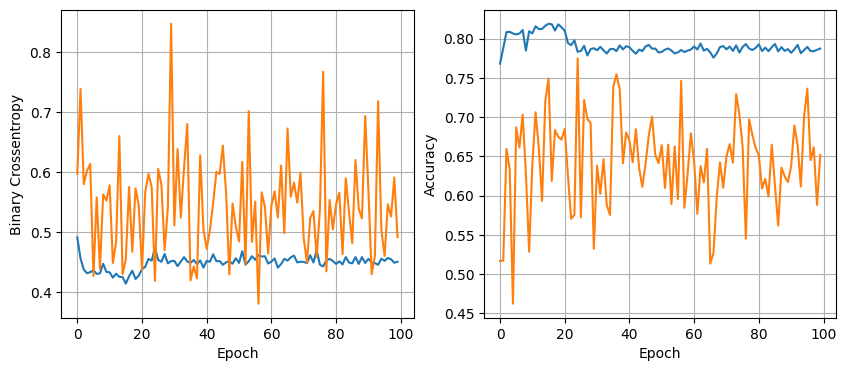

119/119 [==============================] - 0s 859us/step - loss: 0.3584 - accuracy: 0.8433
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 128


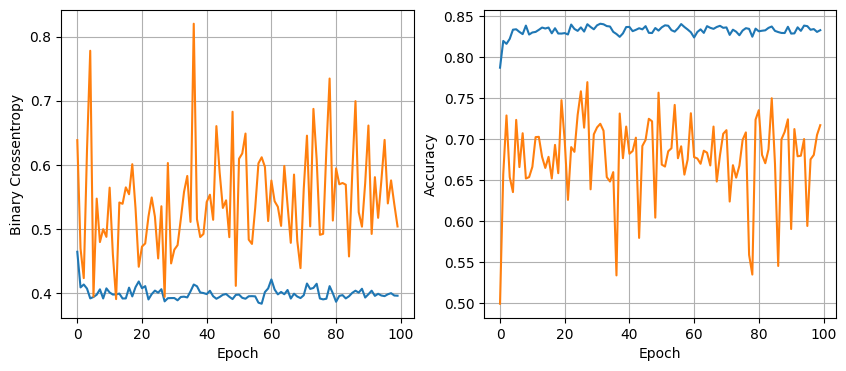

119/119 [==============================] - 0s 860us/step - loss: 0.3562 - accuracy: 0.8596
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 32


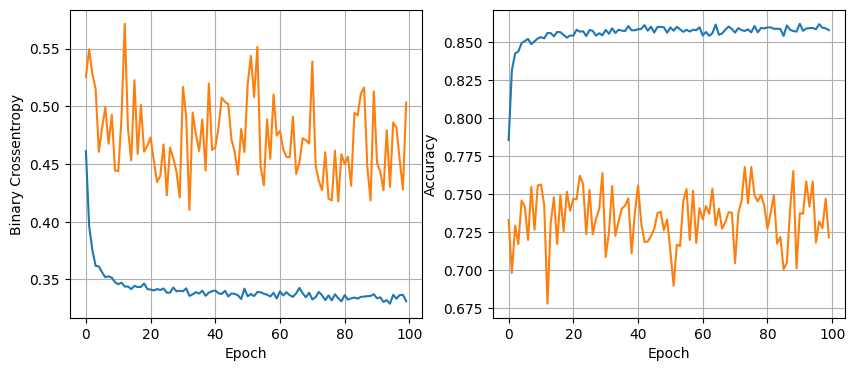

119/119 [==============================] - 0s 907us/step - loss: 0.3184 - accuracy: 0.8667
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 64


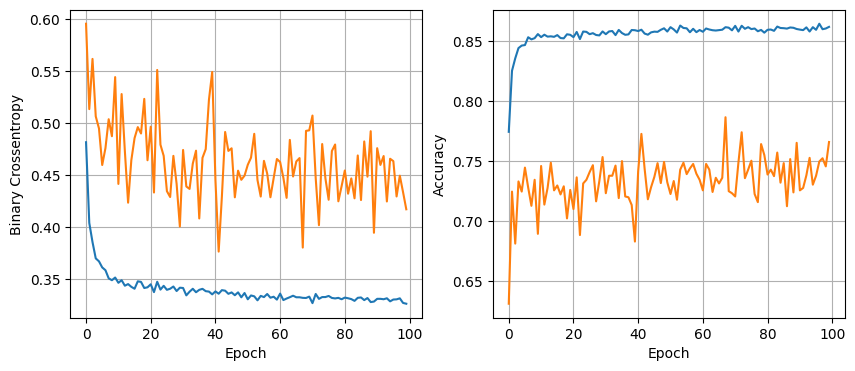

119/119 [==============================] - 0s 853us/step - loss: 0.3205 - accuracy: 0.8665
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 128


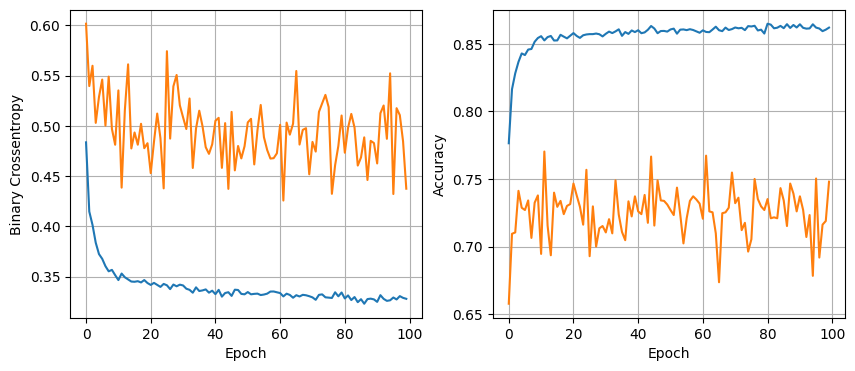

119/119 [==============================] - 0s 833us/step - loss: 0.3151 - accuracy: 0.8701
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 32


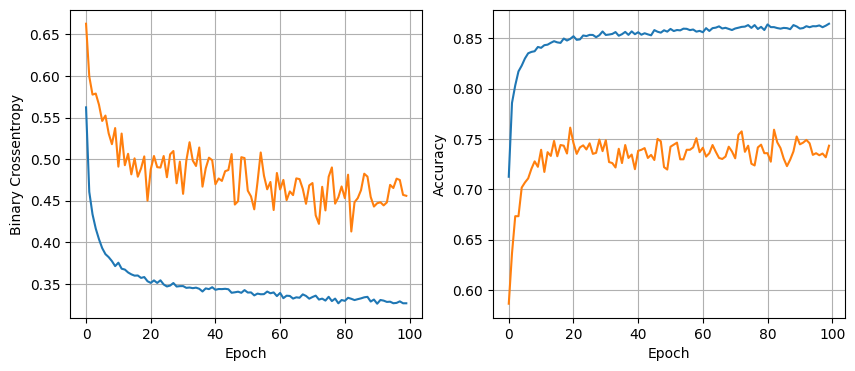

119/119 [==============================] - 0s 889us/step - loss: 0.3117 - accuracy: 0.8699
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 64


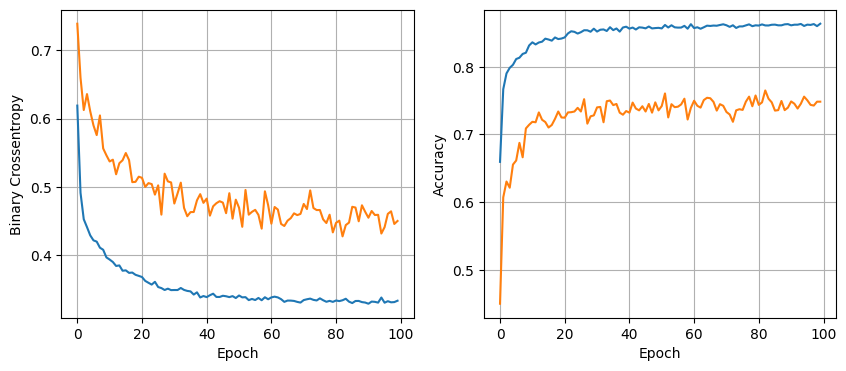

119/119 [==============================] - 0s 811us/step - loss: 0.3187 - accuracy: 0.8715
Number of nodes: 16, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 128


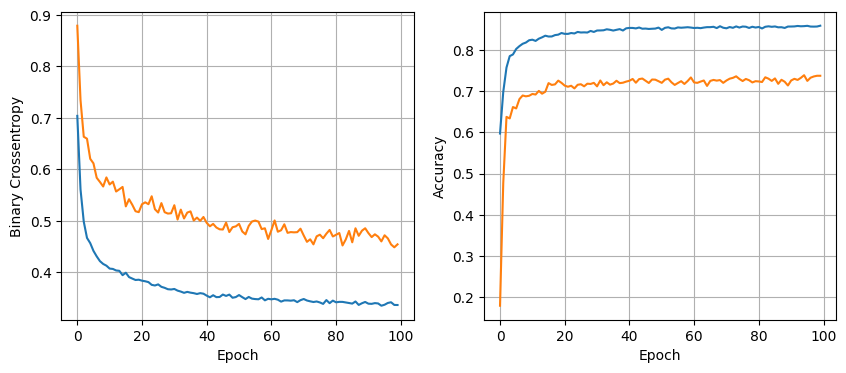

119/119 [==============================] - 0s 876us/step - loss: 0.3237 - accuracy: 0.8675
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.1, Batch Size: 32


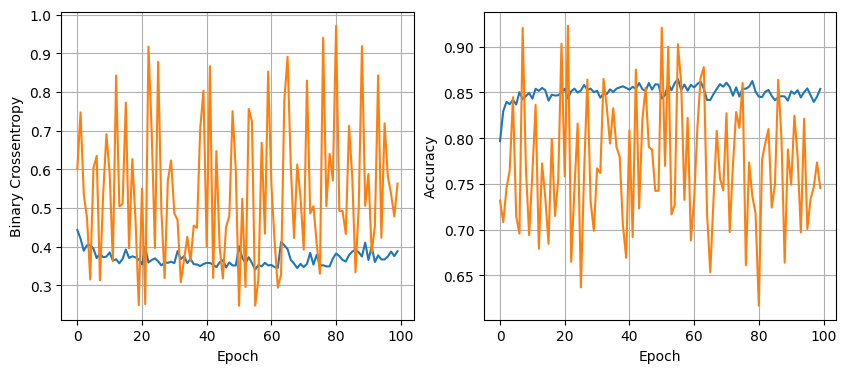

119/119 [==============================] - 0s 933us/step - loss: 0.3476 - accuracy: 0.8599
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.1, Batch Size: 64


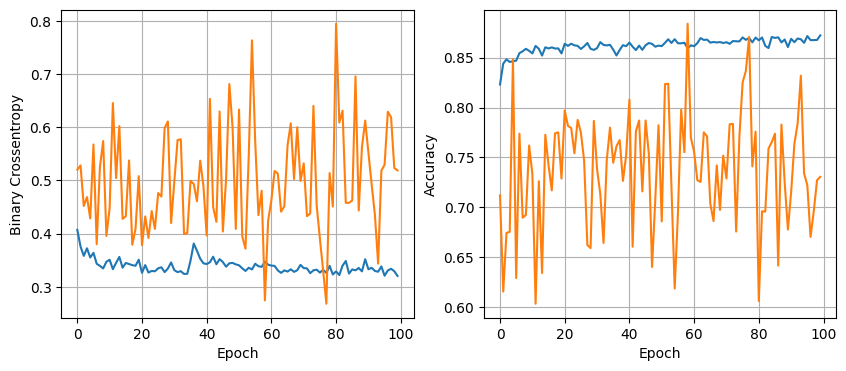

119/119 [==============================] - 0s 889us/step - loss: 0.3364 - accuracy: 0.8646
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.1, Batch Size: 128


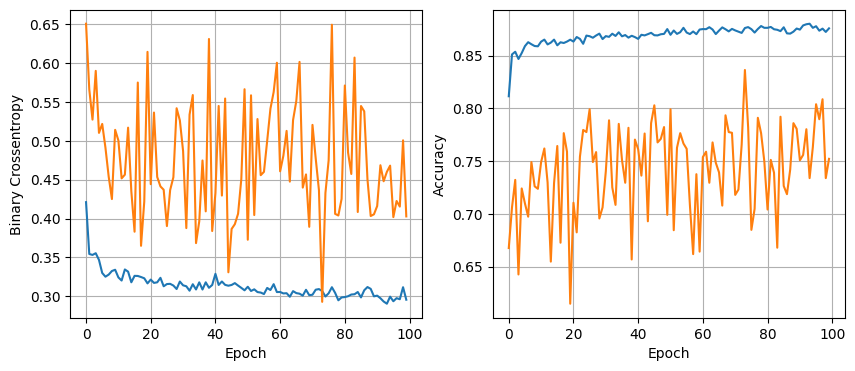

119/119 [==============================] - 0s 949us/step - loss: 0.3311 - accuracy: 0.8741
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.005, Batch Size: 32


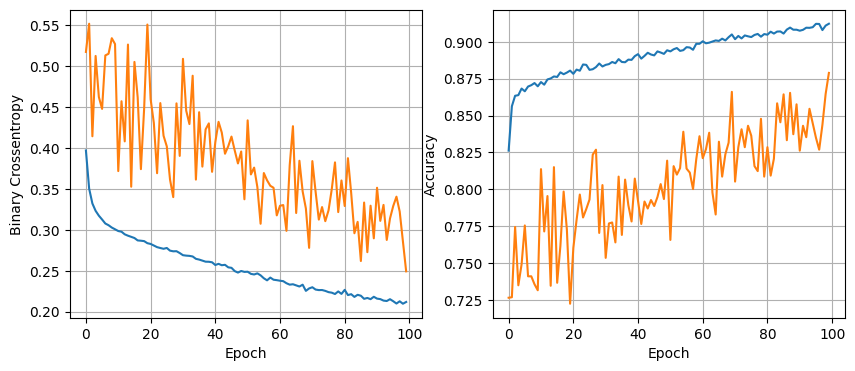

119/119 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8481
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.005, Batch Size: 64


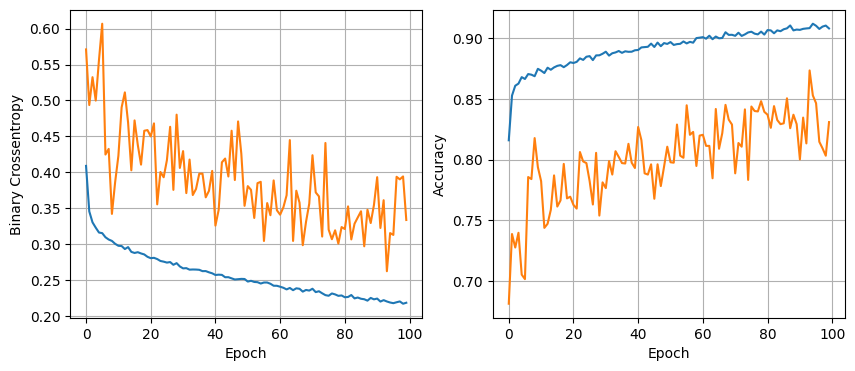

119/119 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8680
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.005, Batch Size: 128


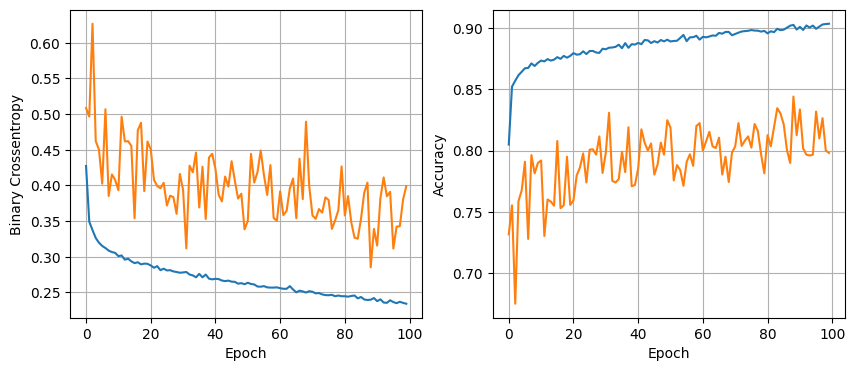

119/119 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8688
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.001, Batch Size: 32


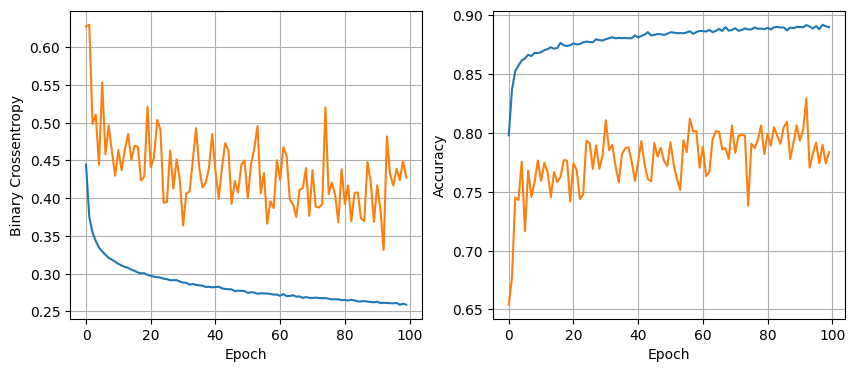

119/119 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8770
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.001, Batch Size: 64


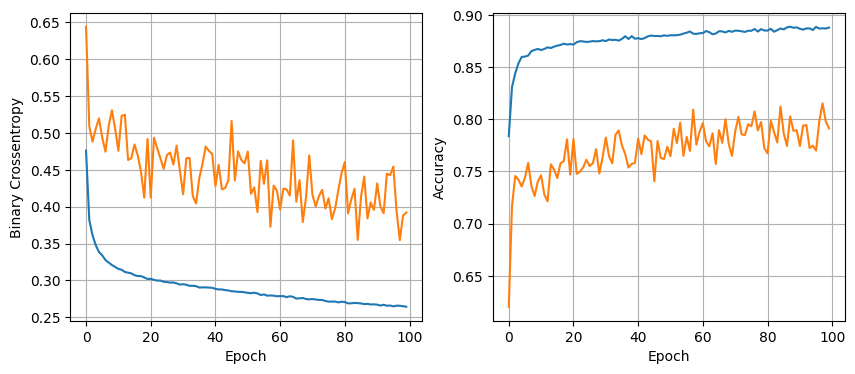

119/119 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8699
Number of nodes: 32, Dropout Probability: 0, learning rate: 0.001, Batch Size: 128


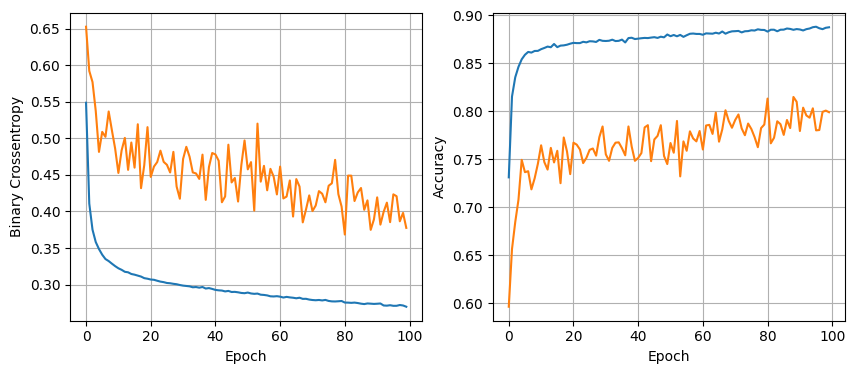

119/119 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8738
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 32


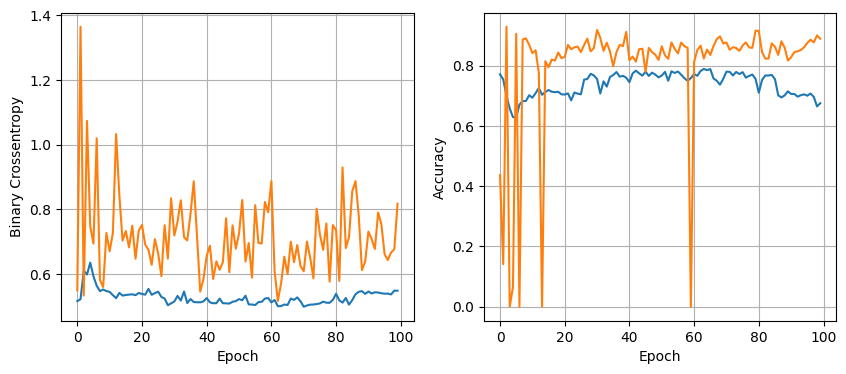

119/119 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7461
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 64


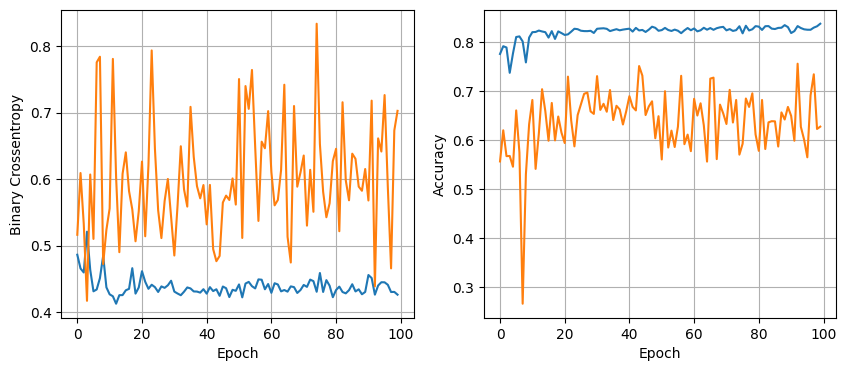

119/119 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8375
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 128


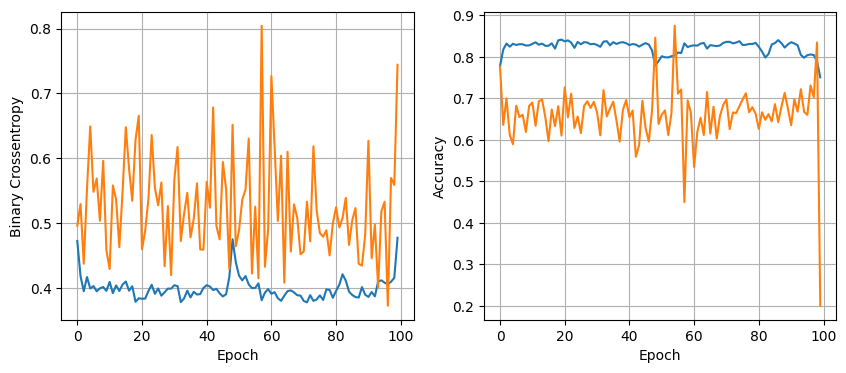

119/119 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7108
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 32


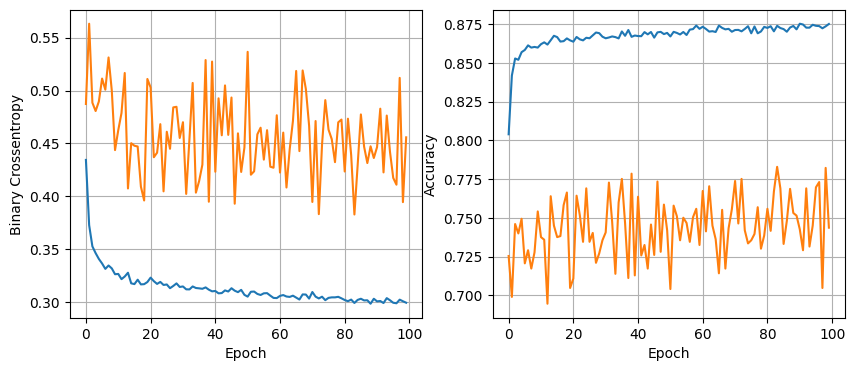

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8712
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 64


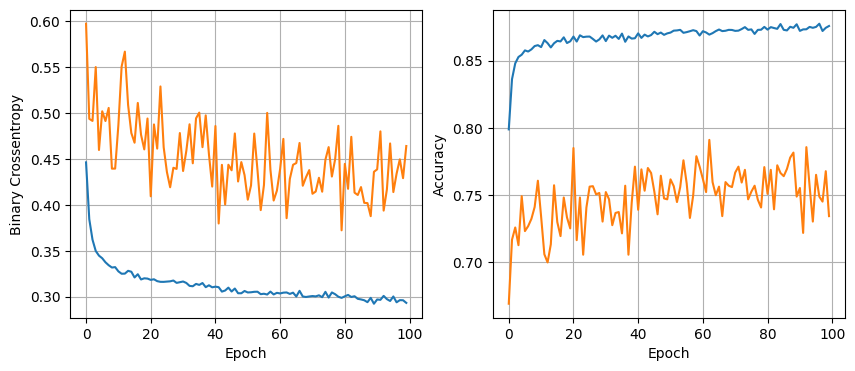

119/119 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8712
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 128


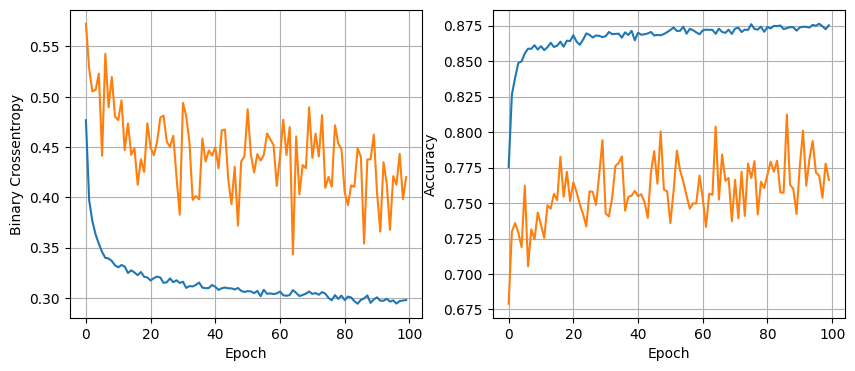

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8772
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 32


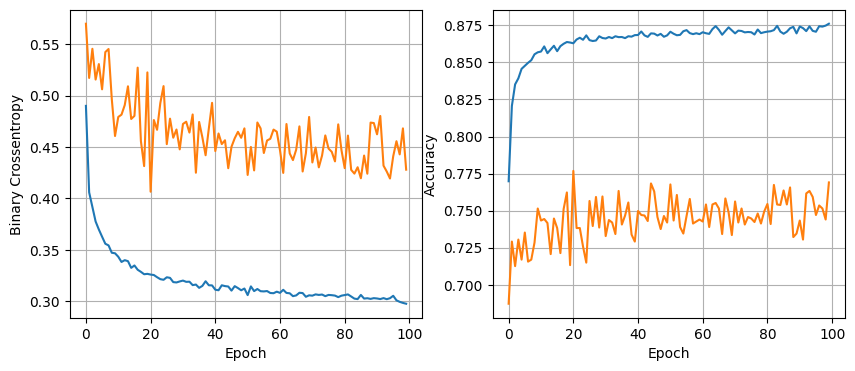

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8696
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 64


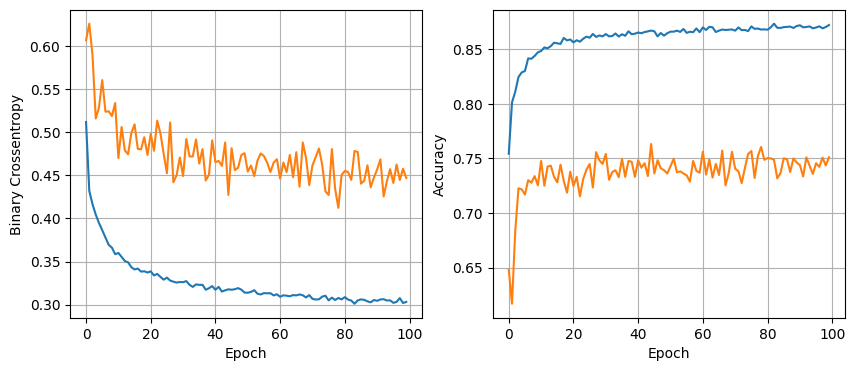

119/119 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8762
Number of nodes: 32, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 128


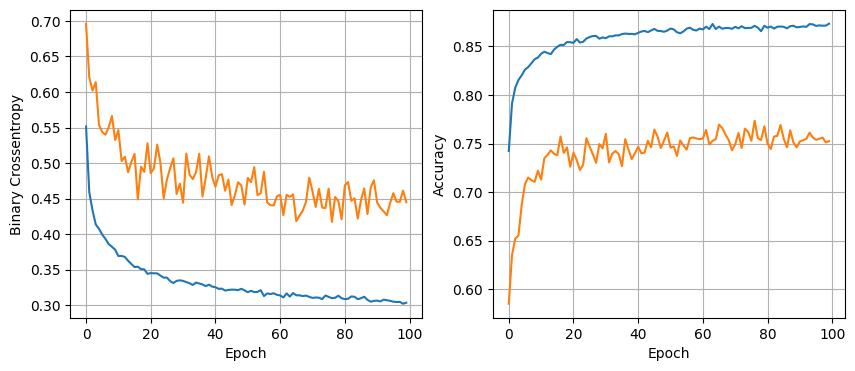

119/119 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8757
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.1, Batch Size: 32


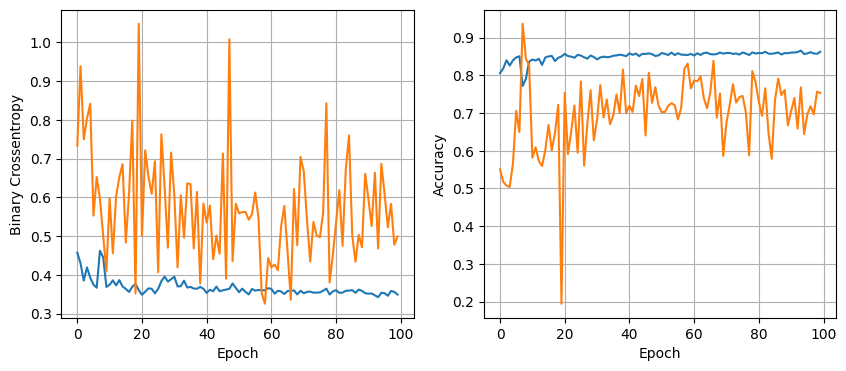

119/119 [==============================] - 0s 901us/step - loss: 0.3757 - accuracy: 0.8557
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.1, Batch Size: 64


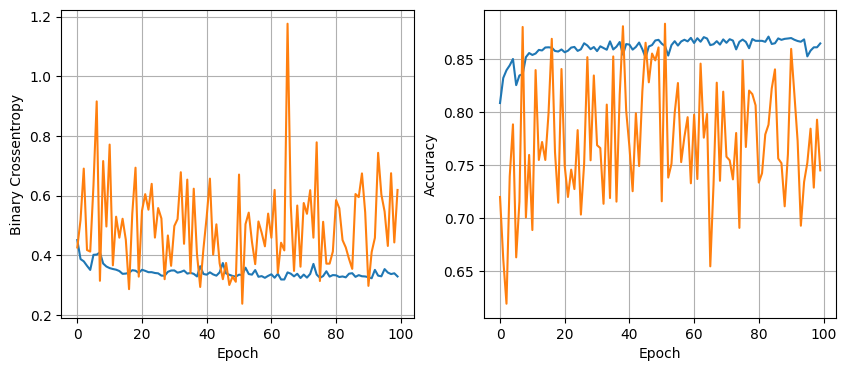

119/119 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8638
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.1, Batch Size: 128


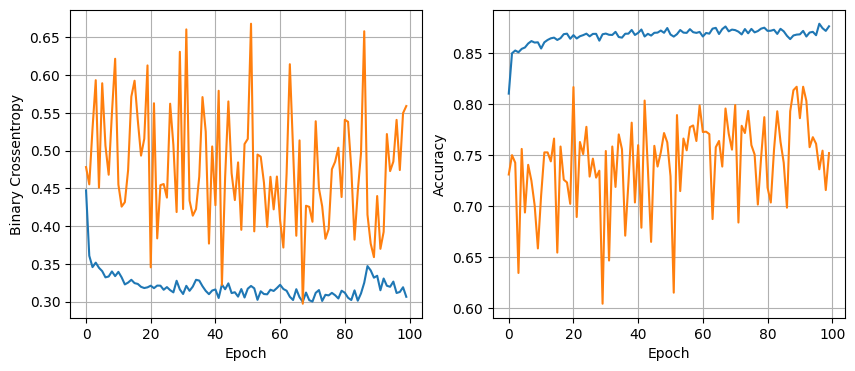

119/119 [==============================] - 0s 988us/step - loss: 0.3589 - accuracy: 0.8633
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.005, Batch Size: 32


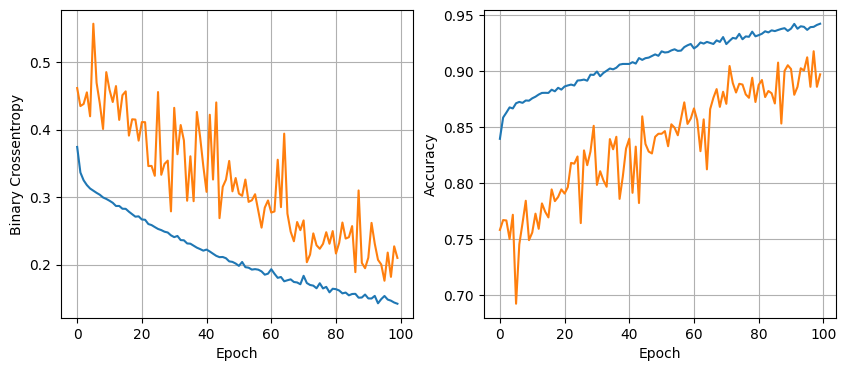

119/119 [==============================] - 0s 933us/step - loss: 0.6130 - accuracy: 0.8573
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.005, Batch Size: 64


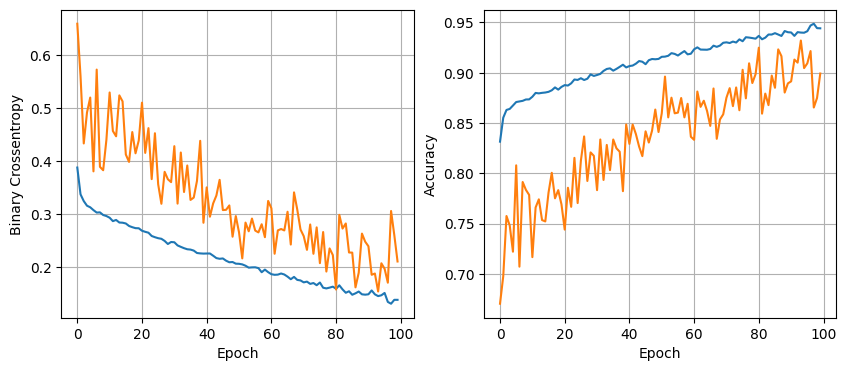

119/119 [==============================] - 0s 937us/step - loss: 0.5490 - accuracy: 0.8596
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.005, Batch Size: 128


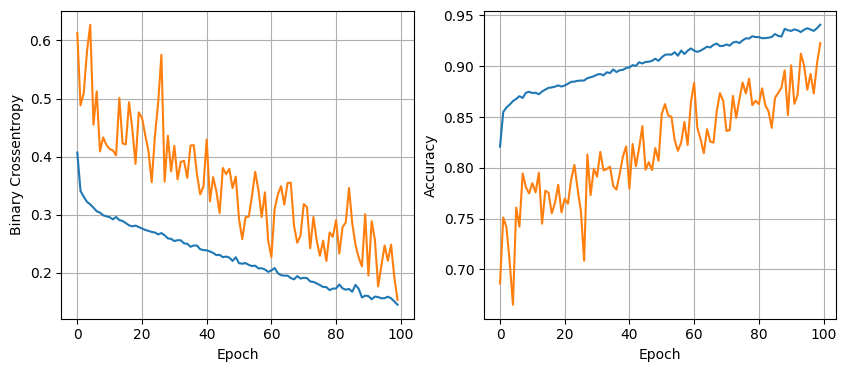

119/119 [==============================] - 0s 958us/step - loss: 0.5029 - accuracy: 0.8528
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.001, Batch Size: 32


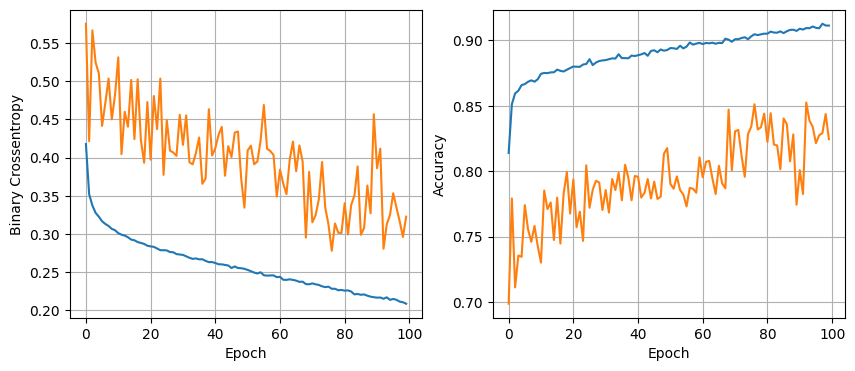

119/119 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8722
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.001, Batch Size: 64


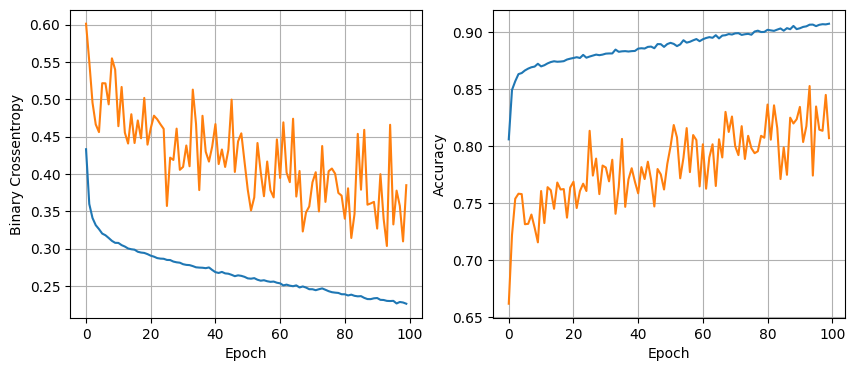

119/119 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8712
Number of nodes: 64, Dropout Probability: 0, learning rate: 0.001, Batch Size: 128


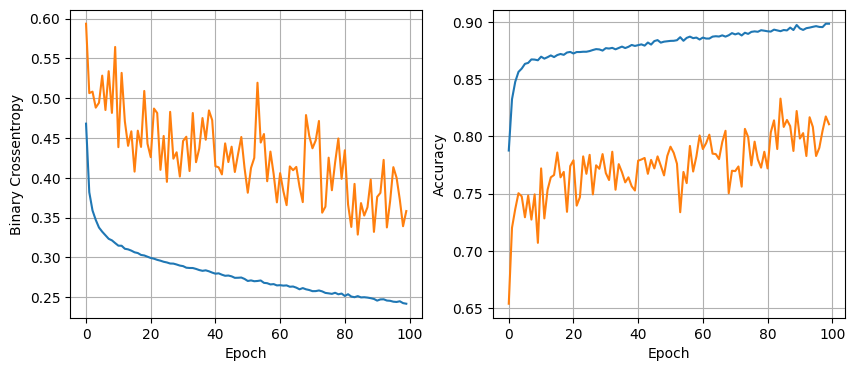

119/119 [==============================] - 0s 953us/step - loss: 0.3168 - accuracy: 0.8741
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 32


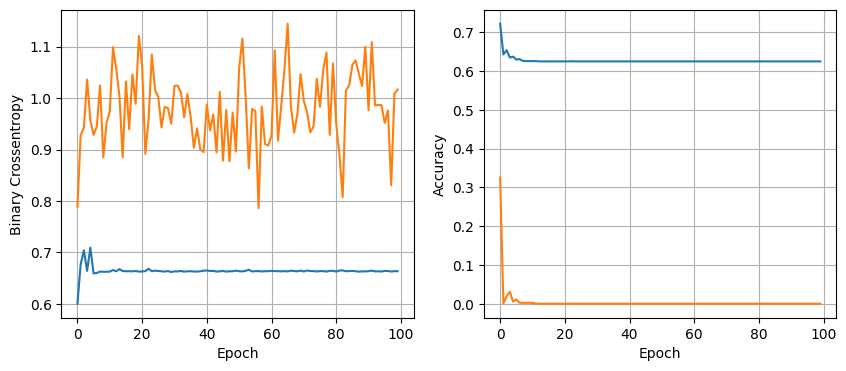

119/119 [==============================] - 0s 818us/step - loss: 0.6537 - accuracy: 0.6396
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 64


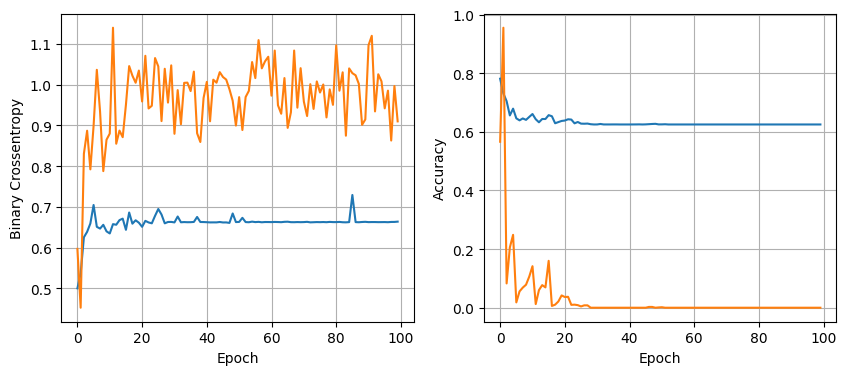

119/119 [==============================] - 0s 919us/step - loss: 0.6574 - accuracy: 0.6396
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.1, Batch Size: 128


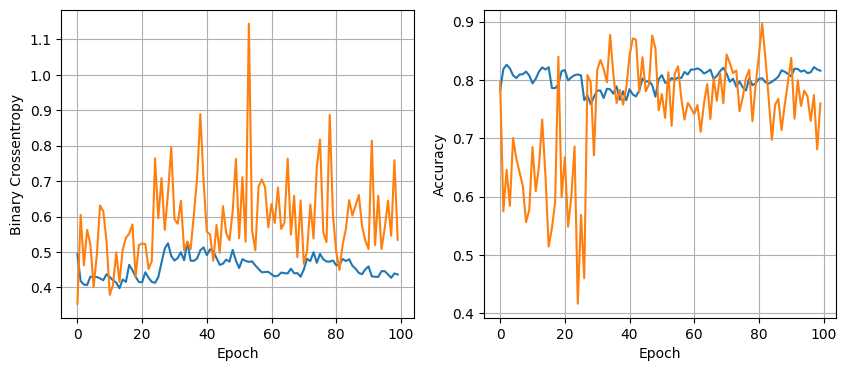

119/119 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8496
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 32


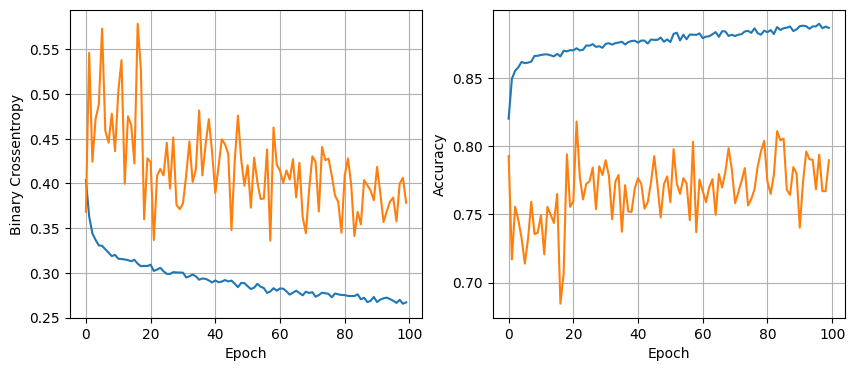

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8785
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 64


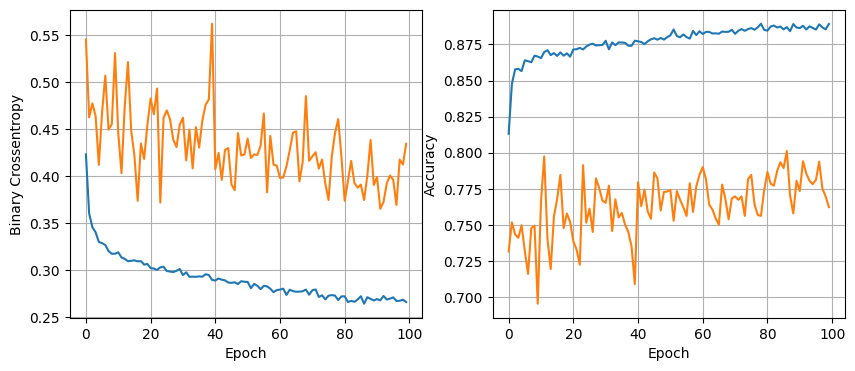

119/119 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8746
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.005, Batch Size: 128


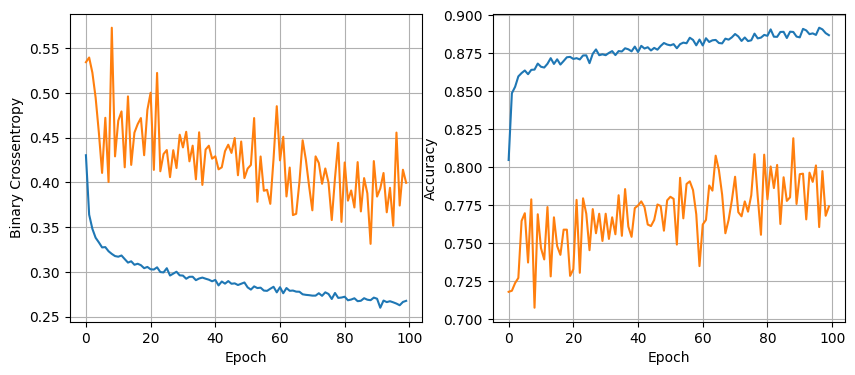

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8754
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 32


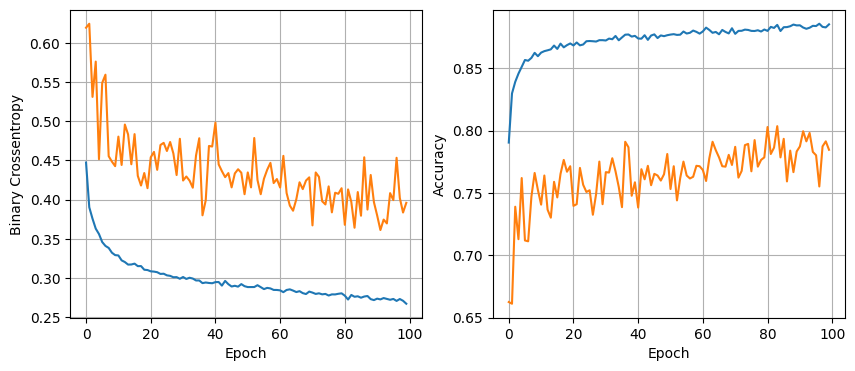

119/119 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8801
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 64


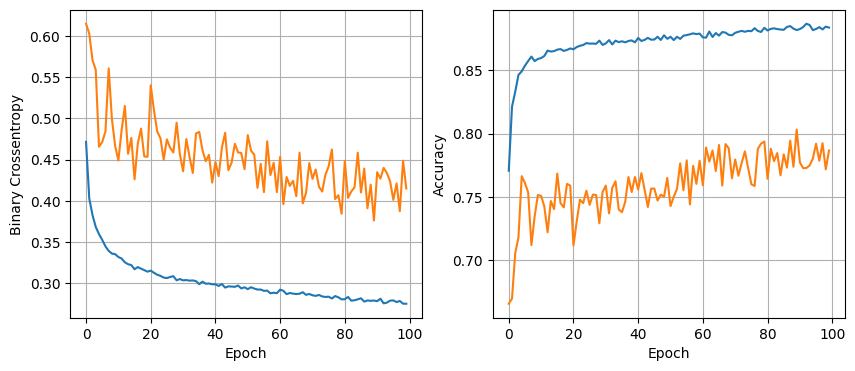

119/119 [==============================] - 0s 1ms/step - loss: 0.2964 - accuracy: 0.8812
Number of nodes: 64, Dropout Probability: 0.2, learning rate: 0.001, Batch Size: 128


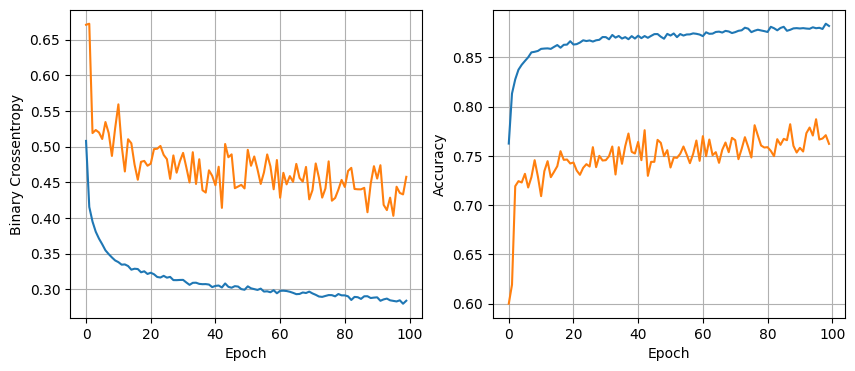

119/119 [==============================] - 0s 950us/step - loss: 0.3011 - accuracy: 0.8746


In [45]:
# This code was used to identify the best parameters for the model, which have been found
# As it takes a long time to execute, it won't be run again.
# Instead, a model with the best parameters has been coded further down

# least_val_loss = float('inf')
# least_loss_model = None

# epochs = 100

# for num_nodes in [16, 32, 64]:
#     for dropout_prob in [0, 0.2]:
#         for lr in [0.1, 0.005, 0.001]:
#             for batch_size in [32, 64, 128]:

#                 print(f"Number of nodes: {num_nodes}, Dropout Probability: {dropout_prob}, learning rate: {lr}, Batch Size: {batch_size}")

#                 model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                
#                 plot_history(history)

#                 val_loss, val_accuracy = model.evaluate(X_valid, Y_valid)

#                 # This is being done to find the best parameters for the model, which would give out the least loss
#                 # These lines of code will constantly update the values to find the best model.
#                 if val_loss < least_val_loss:
#                     least_val_loss = val_loss
#                     least_loss_model = model

The best parameters are

Nodes: 64
Dropout probability: 0.2
Learning Rate: 0.001
Batch Size: 64

So, the next time you wish to run the model and train it, comment the original one out and use these parameters to do the task.

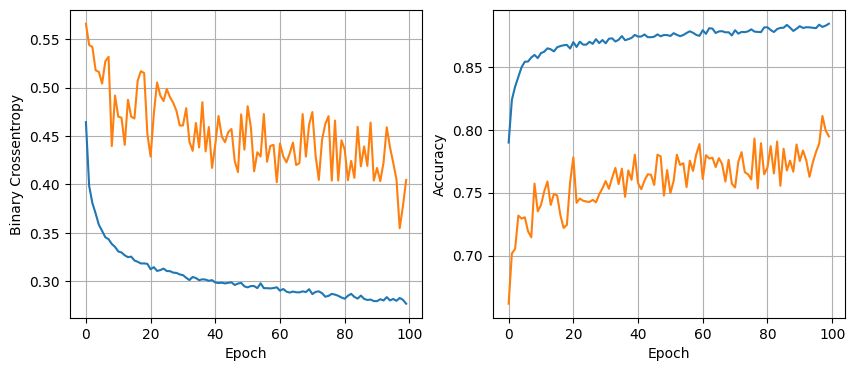

In [65]:
nn_model, nn_history = train_model(X_train, Y_train, num_nodes=64, dropout_prob=0.2, lr=0.001, batch_size=64, epochs=100)

plot_history(nn_history)

In [66]:
# Using the best model obtained using the best parameters.

# No need to use this if a model is being created directly using the best parameters

# The line of code below was used to obtain the predictions from the model which was obtained using the loops. So, we won't be using it anymore
# y_pred = least_loss_model.predict(X_test)

# Instead, the model with the already known best parameters has been created, which will be used.
y_pred = nn_model.predict(X_test)

119/119 [==============================] - 0s 927us/step


In [67]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

# The entire process explained through the comments was to reduce the time taken, as executing the model with loops for various parameters is a very long process.

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [60]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1296
           1       0.88      0.94      0.91      2508

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

